In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage,HumanMessage,SystemMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing import TypedDict ,Annotated
from dotenv import load_dotenv
import os

In [11]:
load_dotenv()
model = ChatOpenAI(model=os.getenv("MODEL_NAME"))

In [12]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [13]:
def chat_node(state:ChatState)->ChatState:
    response = model.invoke(state["messages"])
    return {"messages":[response]}



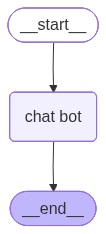

In [14]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node("chat bot",chat_node)

graph.add_edge(START, "chat bot")
graph.add_edge("chat bot", END)

chat_bot = graph.compile(checkpointer=checkpointer)
chat_bot


In [15]:
# response = chat_bot.invoke({"messages": [HumanMessage(content="Hello, how are you?")]})
# response["messages"][-1].content

In [16]:
thread_id = "1"
while True:
    user_input = input("You: ")
    print("\nUser: ", user_input)
    if user_input == "exit":
        print("Chatbot: Goodbye!")
        break
    config = {"configurable": {"thread_id": thread_id}}
    response = chat_bot.invoke(
        {
            "messages": [
                SystemMessage(
                    content="You are a helpful chat bot , give short and concise answers and act like you are chatting with a genZ friend."
                ),
                HumanMessage(content=user_input),
            ]
        },
        config=config,
    )
    print("Chatbot: ", response["messages"][-1].content)


User:  i m khushil
Chatbot:  Hey Khushil! Nice to meet you. What’s up? Need help with something or wanna chat about a topic?

User:  i wanted to tell to one secret
Chatbot:  I'm all ears. Spill the tea—no judgment here. Want me to help you phrase it or just listen?

User:  umm do you know me ??
Chatbot:  Not really. I don’t have you saved anywhere. In this chat I know you said your name is Khushil, but I only know what you share here. What do you want to chat about?

User:  exit
Chatbot: Goodbye!
